# TP6 - Cable coaxial

## ARGUELLO Camilo

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.optimize import minimize, curve_fit
from IPython.display import display, Math

### B. Réflexion et ondes stationnaires

Optimization terminated successfully.


<IPython.core.display.Math object>

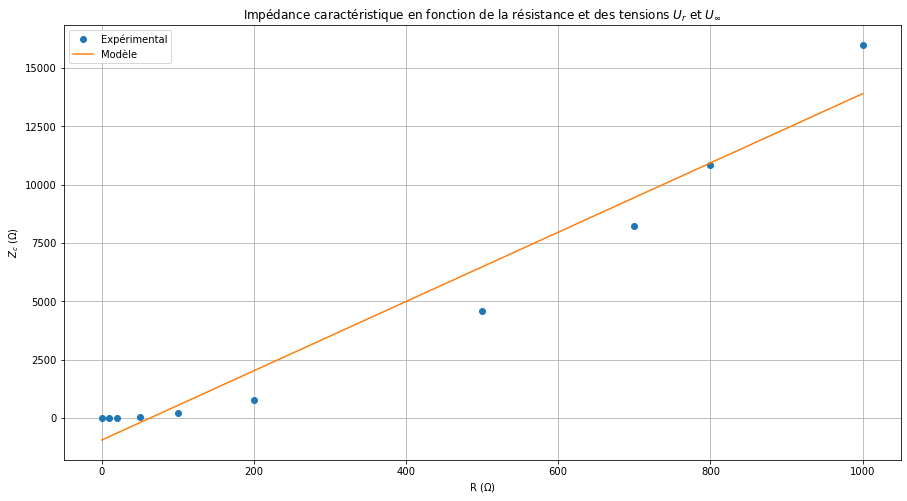

In [28]:
# 10 - 11

# Valeurs R entre 0 e 1 K
R = np.array([0, 10, 20, 50, 100, 200, 500, 700, 800, 1000]) # ohm
U_r = np.array([ -3.92, -3.2, -2.32, -1.12, 1.52, 2.4, 3.28, 3.44, 3.52, 3.6]) # V
U_inf = np.array([ -4.08, -4.08, -4.08, -4.08, -4.08, -4.08, -4.08, -4.08, -4.08, -4.08 ]) # V
Z_c = R * ((U_inf - U_r) / (U_inf + U_r)) # ohm

# modele avec chi-carré
def chi_carre(params):
    a, b = params
    return np.sum(((a * R + b) - Z_c) ** 2)
  
result = minimize(chi_carre, [100, 1])
print(result.message)
a, b = result.x
display(Math(f'Z_c = {np.abs(b/a):.2f} \; \\Omega'))

# Z_c en fonction de R
plt.figure(figsize=(15, 8)) 
plt.plot(R, Z_c, 'o', label='Expérimental')
plt.plot(R, a * R + b, label='Modèle')
plt.title('Impédance caractéristique en fonction de la résistance et des tensions $U_r$ et $U_{\\infty}$')
plt.xlabel('R ($\Omega$)')
plt.ylabel('$Z_c$ ($\Omega$)')
plt.legend()
plt.grid()
plt.show()

<IPython.core.display.Math object>

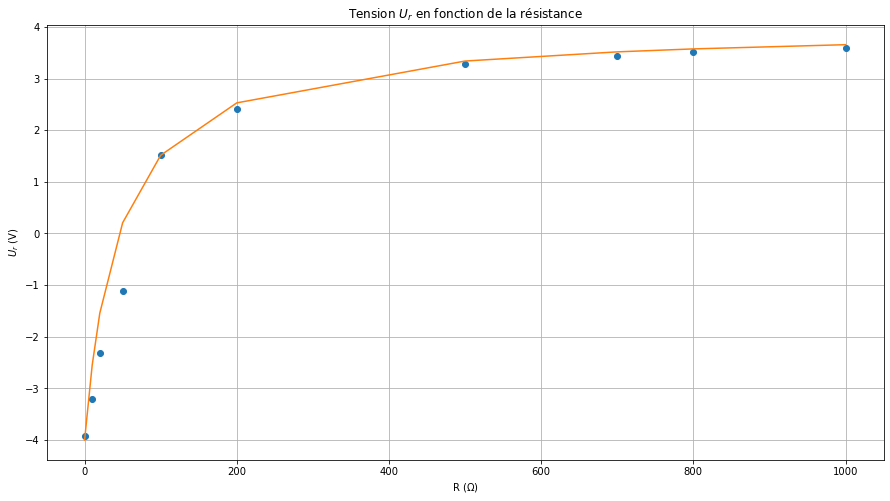

In [63]:
# Ajustement de U_r en fonction de R
def rho (R, a, b):
    return (a * R + b) / (a * R - b)
    
result = curve_fit(rho, R, U_r)
a = result[0][0] * 10
b = result[0][1] * 10
# display a
display(Math(f'Z_c = a = {a:.2f} \; \\Omega'))

# U_r en fonction de R
plt.figure(figsize=(15, 8))
plt.plot(R, U_r, 'o')
plt.plot(R, rho(R, a, b) * 4)
plt.title('Tension $U_r$ en fonction de la résistance')
plt.xlabel('R ($\Omega$)')
plt.ylabel('$U_r$ (V)')
plt.grid()
plt.show()

### Résonateur

In [68]:
l = 100 # m

In [69]:
# 15 
# frequence entre 100KHz et 6MHz
v1 = np.array([100,500, 1000, 2000, 3000, 4000, 4400, 5500]) * 1e3 # Hz
v_p_ouv = np.array([99, 502, 1005,1400, 2400, 3005, 4400, 5400]) * 1e3 # Hz

In [70]:
# 16
v2 = np.array([900, 1900, 2800, 3800, 4800, 5800]) * 1e3 # Hz
v_p_cc = np.array([ 900, 1900, 2800, 3800, 4800, 5800 ]) * 1e3 # Hz

<IPython.core.display.Math object>

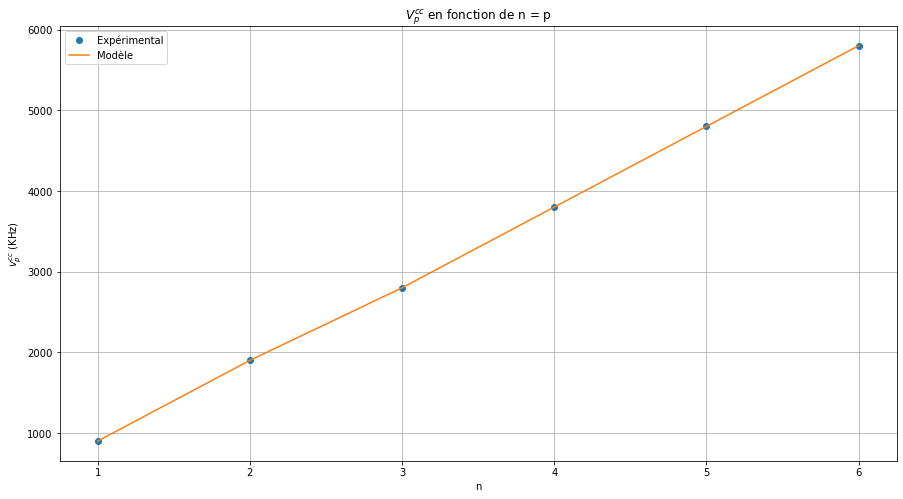

In [77]:
# n = p avec p \belong N
# v_p_cc = n * (c / 2 * l')

# Trouver c en ajustant les données
def f(x, c, l):
    return x * (c / (2 * l))

n = np.arange(1, 7)
c = 2 * l * v_p_cc / n

display(Math(f'c = {c.mean():.2e} \; m/s'))

# v_p_ouv en fonction de n = p/2
plt.figure(figsize=(15, 8))
plt.plot(n, v_p_cc / 1e3, 'o', label='Expérimental')
plt.plot(n, f(n, c, l) / 1e3, label='Modèle')
plt.title('$V_p^{cc}$ en fonction de n = p')
plt.xlabel('n')
plt.ylabel('$v_p^{cc}$ (KHz)')
plt.grid()
plt.legend()
plt.show()